In [93]:
# ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSVファイルの読み込み
df = pd.read_csv('./2022/公開データ/1588.csv')

In [117]:
# Awarenessレベルの判定関数の定義
def awareness_check_values(row):
    if row['q5_sec2_1'] and row['q5_sec3_1'] and row['q5_sec4_1'] and row['q5_sec5_1'] and row['q5_sec6_1'] == 1: # 全て図書館が回答している場合
        if row['q11'] == 5: # 何らかの取り組みが始まっているかわからない
            return '1'
        else:
            return '2'
    elif row['q16_5'] == 1: # 関わる部署が可視化されていない
        return '3'
    else:
        return '4'

In [118]:
# User needsレベルの判定関数の定義
def user_needs_check_values(row):
    if row['q6'] == 2: # 実施している
        if row['q7'] == 3: # 機関に所属する全研究者を対象に実施した
            if row['q10'] == 1: # 年1回程度
                return '4'
            else:
                return '3'
        else:
            return '2'
    else:
        return '1'

In [119]:
# Budgetレベルの判定関数の定義
def budget_check_values(row):
    if row['q15'] == 1: # 機関全体の運営費を財源として予算計上している
        return '5'
    elif row['q15'] == 2: # 担当部局の運営費の範囲内で予算計上している
        return '4'
    elif row['q15'] == 3: # 外部資金を財源として予算計上している
        return '3'
    else:
        return '1'

In [120]:
# Data policyレベルの判定関数の定義
def data_policy_check_values(row):
    if row['q12'] == 3: # 機関としてのポリシーを策定した
        if row['q13'] == 4: # 機関としてのポリシーに沿った実施手順を明文化した
            return '3'
        else:
            return '2'
    elif row['q12'] == 2 or 4: # 一部の部局で策定済みまたは検討中である / 機関全体でのポリシーを委員会、ワーキンググループ等で検討中である
        return '2'
    else:
        return '1'

In [121]:
# Servicesレベルの判定関数の定義
def services_check_values(row):
    if row['q18_1'] or row['q18_2'] or row['q18_3'] or row['q18_4'] or row['q18_5'] or row['q18_6'] or row['q18_7'] == 1: # 何らかの研究データ管理サービスを実施している
        if row['q19_2'] and row['q19_3'] and row['q19_4'] and row['q19_5'] and row['q19_6'] == 2: # 図書館以外で研究データ管理サービスに関わっている部署を知っている
            return '2'
        else:
            return '3'
    else:
        return '1'

In [122]:
# IT infrastructureレベルの判定関数の定義
def IT_infrastructure_check_values(row): # ストレージに限定
    if row['q28'] == 1: # 機関レベルで検討・対応が進められている
        return '3'
    elif row['q28'] == 2: # 部局ごとに検討・対応が進められている
        return '2'
    else:
        return '1'

In [123]:
# 関数を辞書に格納
functions = {
    'awareness': awareness_check_values,
    'user_needs': user_needs_check_values,
    'data_policy': data_policy_check_values,
    'budget': budget_check_values,
    'IT_infrastructure': IT_infrastructure_check_values,
    'services': services_check_values
}

# 各関数をDataFrameの各行に適用して新しいDataFrameを作成
results_df = pd.DataFrame({name: df.apply(func, axis=1) for name, func in functions.items()})

In [124]:
# 平均値の算出
# 各列を数値型に変換
results_df = results_df.apply(pd.to_numeric, errors='coerce')

# 平均値の算出
average_scores = results_df.mean(axis=0)

In [126]:
# ファイル出力
df_maturity.to_csv("mean.csv")

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12465 (\N{KATAKANA LETTER KE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


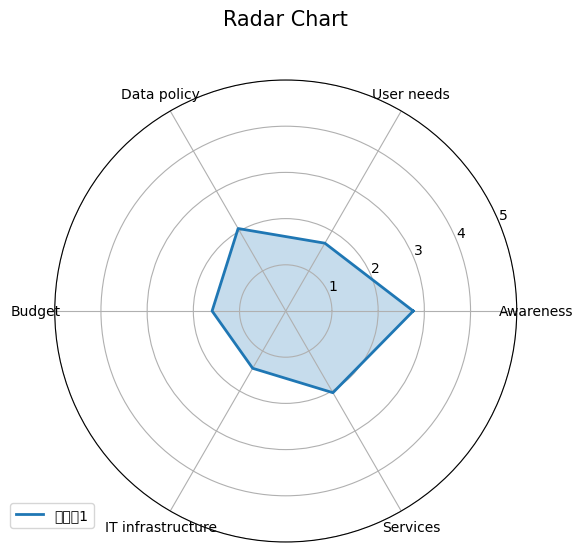

In [125]:
# レーダーチャート化
def plot_radar_chart(df, title='Radar Chart'):
    # カテゴリの数
    labels = df_maturity.columns
    num_vars = len(labels)

    # 角度を計算
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # 閉じるために始点を追加

    # プロットの設定
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    plt.xticks(angles[:-1], labels)

    # データのプロット
    for idx, row in df.iterrows():
        maturity_data = row.tolist()
        maturity_data += maturity_data[:1]  # 閉じるために始点を追加
        ax.plot(angles, maturity_data, linewidth=2, linestyle='solid', label=f'ケース{idx+1}')
        ax.fill(angles, maturity_data, alpha=0.25)

    # 軸の目盛りを設定
    ax.set_yticks([1, 2, 3, 4, 5])  # 目盛りを1, 2, 3, 4, 5に設定

    # その他の設定
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # 表示
    plt.show()

# レーダーチャートを描画
plot_radar_chart(df_maturity)